            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
1981-01-07  15.8
1981-01-08  17.4
1981-01-09  21.8
1981-01-10  20.0
1981-01-11  16.2
1981-01-12  13.3
1981-01-13  16.7
1981-01-14  21.5
1981-01-15  25.0
1981-01-16  20.7
1981-01-17  20.6
1981-01-18  24.8
1981-01-19  17.7
1981-01-20  15.5


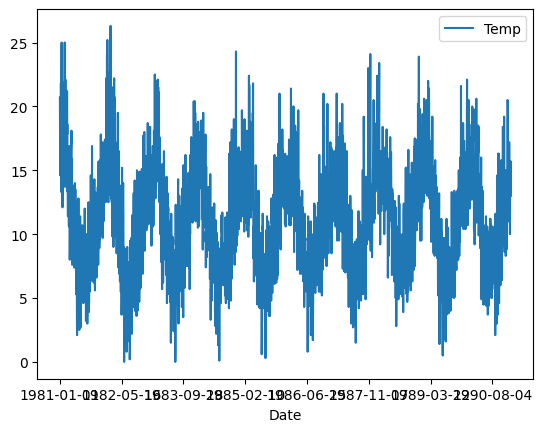

In [2]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot

# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [4]:
# split the dataset
from pandas import read_csv
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 3643, Validation 7


In [5]:
# create a differenced series
import numpy 
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3278
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -8673.748
Date:                Sat, 01 Jun 2024   AIC                          17367.497
Time:                        20:17:59   BIC                          17428.447
Sample:                             0   HQIC                         17389.322
                               - 3278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.133      0.092      0.927      -0.248       0.272
ar.L1          1.1428      0.316      3.619      0.000       0.524       1.762
ar.L2         -0.4348      0.169     -2.577      0.0

In [7]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [8]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)

In [9]:
forecast

array([14.86119967])

In [46]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
# model = ARIMA(differenced, order=(7,0,1))
model = ARIMA(X, order=(7,0,1))
model_fit = model.fit()

model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3643
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -8369.202
Date:                Sat, 01 Jun 2024   AIC                          16758.404
Time:                        20:30:17   BIC                          16820.410
Sample:                             0   HQIC                         16780.488
                               - 3643                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4530      0.798     14.359      0.000       9.890      13.016
ar.L1          1.4821      0.024     61.063      0.000       1.435       1.530
ar.L2         -0.6191      0.031    -20.203      0.000      -0.679      -0.559
ar.L3          0.1321      0.031      4.294      0.000       0.072       0.192
ar.L4         -0.0065      0.031     -0.209      0.834      -0.067       0.054
ar.L5          0.0054      0.030      0.179      0.858      -0.054       0.065
ar.L6         -0.0026      0.028     -0.093      0.926      -0.058       0.053
ar.L7          0.0034      0.018      0.190      0.849      -0.032       0.039
ma.L1         -0.8895      0.019    -47.375      0.000      -0.926      -0.853
sigma2         5.7911      0.129     45.004      0.000       5.539       6.043
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7000)
# invert the differenced forecast to something usable
history = [x for x in X]
original_history = history.copy()

day = 1
for yhat in forecast:
	# inverted = inverse_difference(history, yhat, days_in_year)
	inverted = yhat
	print('Day %d: %f' % (day, inverted))
	history.append([inverted])
	day += 1

Day 1: 11.572669
Day 2: 12.851655
Day 3: 13.262723
Day 4: 13.308810
Day 5: 13.258865
Day 6: 13.223482
Day 7: 13.194808
Day 8: 13.171594
Day 9: 13.154153
Day 10: 13.140135
Day 11: 13.127373
Day 12: 13.114747
Day 13: 13.102025
Day 14: 13.089258
Day 15: 13.076516
Day 16: 13.063844
Day 17: 13.051264
Day 18: 13.038783
Day 19: 13.026402
Day 20: 13.014120
Day 21: 13.001934
Day 22: 12.989844
Day 23: 12.977849
Day 24: 12.965947
Day 25: 12.954138
Day 26: 12.942421
Day 27: 12.930795
Day 28: 12.919261
Day 29: 12.907816
Day 30: 12.896461
Day 31: 12.885194
Day 32: 12.874015
Day 33: 12.862924
Day 34: 12.851919
Day 35: 12.841000
Day 36: 12.830166
Day 37: 12.819417
Day 38: 12.808751
Day 39: 12.798169
Day 40: 12.787670
Day 41: 12.777252
Day 42: 12.766916
Day 43: 12.756660
Day 44: 12.746485
Day 45: 12.736389
Day 46: 12.726371
Day 47: 12.716432
Day 48: 12.706571
Day 49: 12.696786
Day 50: 12.687078
Day 51: 12.677446
Day 52: 12.667888
Day 53: 12.658406
Day 54: 12.648997
Day 55: 12.639662
Day 56: 12.630400
D

array([20.7       , 17.9       , 18.8       , ..., 11.45304506,
       11.45304506, 11.45304506])

In [60]:
len(history), len(original_history)

(10643, 3643)

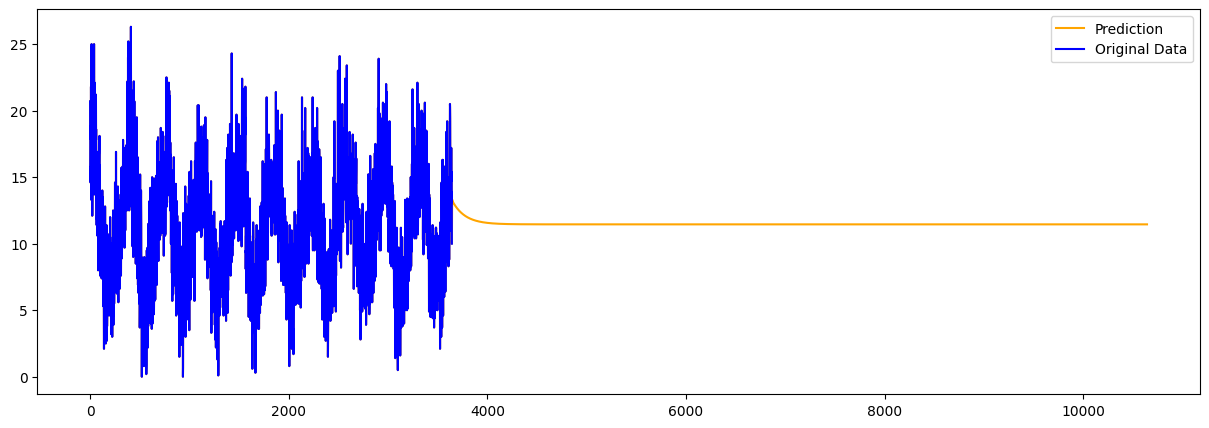

In [61]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))
plt.plot(numpy.array(history).flatten(), alpha = 1.0, label = "Prediction", color = "orange")
plt.plot(original_history, alpha = 1.0, label = "Original Data", color = "blue")
plt.legend()
plt.show()